# Support Vector Machine (GD Method)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs

## Dataset

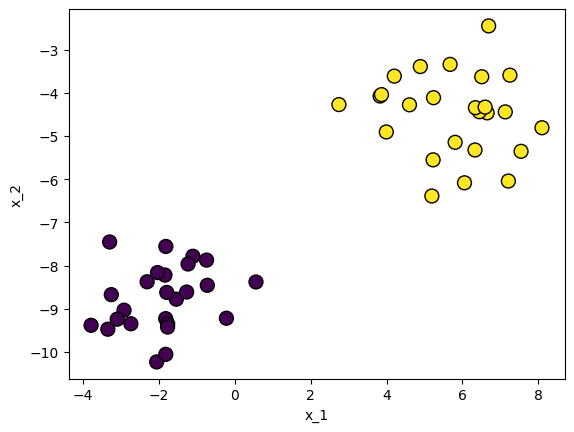

In [2]:
X, y = make_blobs(n_samples=50, n_features=2, centers=2, cluster_std=1.05, random_state=40)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=100, edgecolor="k", linewidth=1)
plt.xlabel("x_1")
plt.ylabel("x_2")
plt.show()

## Model


In [4]:
class SVM:
    def __init__(self, learning_rate=0.001, n_iters=1000):
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        self.weights = None  # 가중치 벡터
        self.bias = None  # 절편

    def fit(self, X, y):
        """
        SVM 모델 학습
        - X: 입력 데이터 (data 개수 x feature 개수)
        - y: 타겟 레이블 (data 개수만큼 -1 또는 1로 이루어진 배열)
        """
        n_samples, n_features = X.shape # n_samples: 데이터 개수

        # 레이블을 -1 또는 1로 변환
        y_modified = np.where(y <= 0, -1, 1)

        # Weight 및 bias 초기화
        self.weights = np.zeros(n_features)  # 가중치 벡터
        self.bias = 0  # 절편

        # Gradient Decent
        for _ in range(self.n_iters):
          for idx in range(n_samples):
            X_i = X[idx]
            y_i = y_modified[idx]

            condition = y_i * (np.dot(self.weights.T,X_i)+self.bias) >= +1

            if condition:
              pass
            else:
              self.weights = self.weights - self.learning_rate *(-np.dot(y_i,X_i))
              self.bias = self.bias - self.learning_rate *(-y_i)


    def predict(self, X):
        """
        새로운 데이터에 대한 클래스 예측
        - X: 입력 데이터
        - 반환값: 예측된 클래스 레이블 (-1 또는 1)
        """
        # 결정 함수: w^T * x + b
        linear_output = np.dot(X, self.weights) + self.bias
        # sign 함수로 -1 또는 1로 변환
        return np.sign(linear_output)


## Prediction

In [5]:
model = SVM()
margin_log = model.fit(X, y)

print(model.weights, model.bias)

[0.60413086 0.16688988] 0.058000000000000045


In [6]:
margin = 2 / np.sqrt(np.dot(model.weights.T, model.weights))
print(margin)

3.1910212637738264


In [7]:
def get_hyperplane_value(x, w, b, offset):
    return (-w[0] * x - b + offset) / w[1]

def visualize_svm(w, b):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    plt.scatter(X[:, 0], X[:, 1], marker="o", c=y)

    x0_1 = np.amin(X[:, 0])
    x0_2 = np.amax(X[:, 0])

    x1_1 = get_hyperplane_value(x0_1, w, b, 0)
    x1_2 = get_hyperplane_value(x0_2, w, b, 0)

    x1_1_m = get_hyperplane_value(x0_1, w, b, -1)
    x1_2_m = get_hyperplane_value(x0_2, w, b, -1)

    x1_1_p = get_hyperplane_value(x0_1, w, b, 1)
    x1_2_p = get_hyperplane_value(x0_2, w, b, 1)

    ax.plot([x0_1, x0_2], [x1_1, x1_2], "y--")
    ax.plot([x0_1, x0_2], [x1_1_m, x1_2_m], "k")
    ax.plot([x0_1, x0_2], [x1_1_p, x1_2_p], "k")

    x1_min = np.amin(X[:, 1])
    x1_max = np.amax(X[:, 1])
    ax.set_ylim([x1_min - 3, x1_max + 3])
    plt.xlabel("x_1")
    plt.ylabel("x_2")
    plt.show()

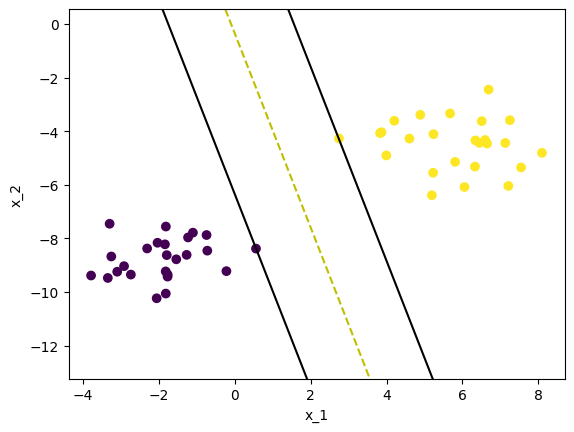

In [8]:
visualize_svm(model.weights, model.bias)

## scikit-learn 라이브러리를 이용한 SVM

In [ ]:
from sklearn.svm import SVC
model = SVC(kernel='linear')
model.fit(X, y)

In [ ]:
visualize_svm(model.coef_[0], model.intercept_)

In [ ]:
margin = 2 / np.sqrt(np.dot(model.coef_[0].T, model.coef_[0]))
print(margin)